In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reflecto.simulate.simul_genx import build_sample, calc_refl, ParamSet, get_f

def validate_physics():
    print("=== XRR Simulation Physics Check ===")

    # ---------------------------------------------------------
    # 1. Setup Simulation Grid
    # ---------------------------------------------------------
    # Standard XRR range: q = 0.0 ~ 0.5 (1/A)
    qs = np.linspace(0.001, 0.5, 500) 

    # ---------------------------------------------------------
    # 2. Test Case: Silicon Substrate (Critical Angle Check)
    # ---------------------------------------------------------
    # To test the critical angle, we create a film identical to the substrate
    # or just look at the substrate region.
    # Si SLD is approx 2.07e-6 A^-2.
    
    # Let's create a thick film with Si properties to see the critical angle clearly
    si_like_film = ParamSet(thickness=1000, roughness=0, sld=2.07) 
    no_sio2 = ParamSet(thickness=0, roughness=0, sld=0) # No surface oxide

    sample_si = build_sample(si_like_film, no_sio2)
    R_si = calc_refl(sample_si, qs)

    # Theoretical Critical Angle (qc) for Si
    # qc ≈ 4 * sqrt(pi * SLD)  (for X-rays)
    # SLD = 2.07e-6
    sld_si = 2.07e-6
    qc_theory = 4 * np.sqrt(np.pi * sld_si) 
    print(f"[1] Critical Angle Check")
    print(f"    Theoretical qc (Si): {qc_theory:.4f} A^-1")
    
    # Find where R drops below 0.5 (approximate qc)
    qc_sim_idx = np.where(R_si < 0.5)[0][0]
    qc_sim = qs[qc_sim_idx]
    print(f"    Simulated qc:        {qc_sim:.4f} A^-1")
    
    if abs(qc_theory - qc_sim) < 0.005:
        print("    ✅ PASS: Critical angle matches physics.")
    else:
        print("    ❌ FAIL: Critical angle is off. Check 'r_e' or 'get_f' units.")

    # ---------------------------------------------------------
    # 3. Test Case: Thickness Fringes (Kiessig Fringes)
    # ---------------------------------------------------------
    # D = 200 Angstrom
    target_d = 200.0
    film_p = ParamSet(thickness=target_d, roughness=0, sld=20.0) # High contrast
    sample_fringes = build_sample(film_p, no_sio2)
    R_fringes = calc_refl(sample_fringes, qs)

    # Theoretical Fringe Spacing (Delta q)
    # Delta q ≈ 2 * pi / d
    dq_theory = 2 * np.pi / target_d
    print(f"\n[2] Fringe Spacing Check (d={target_d}A)")
    print(f"    Theoretical Delta q: {dq_theory:.4f} A^-1")

    # ---------------------------------------------------------
    # 4. Visualization
    # ---------------------------------------------------------
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Critical Angle
    plt.subplot(1, 2, 1)
    plt.plot(qs, R_si, label='Simulated Si', linewidth=2)
    plt.axvline(qc_theory, color='r', linestyle='--', label=f'Theory qc={qc_theory:.3f}')
    plt.title("Check 1: Critical Angle (Si)")
    plt.xlabel("q [1/A]")
    plt.ylabel("Reflectivity")
    plt.yscale("log")
    plt.xlim(0, 0.1)
    plt.ylim(1e-2, 2.0)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Fringes
    plt.subplot(1, 2, 2)
    plt.plot(qs, R_fringes, label=f'Film d={target_d}A', color='green')
    
    # Draw lines at expected peaks (approximate)
    for i in range(1, 6):
        q_peak = qc_theory**2 + (2*np.pi*i/target_d)**2 # approximation using qc
        q_peak = np.sqrt(q_peak)
        if q_peak > 0.5: break
        plt.axvline(q_peak, color='orange', alpha=0.5, linestyle=':')
    
    plt.plot([], [], color='orange', linestyle=':', label='Expected Peaks')
    plt.title(f"Check 2: Thickness Fringes (d={target_d}A)")
    plt.xlabel("q [1/A]")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


=== XRR Simulation Physics Check ===
[1] Critical Angle Check
    Theoretical qc (Si): 0.0102 A^-1
    Simulated qc:        0.0010 A^-1
    ❌ FAIL: Critical angle is off. Check 'r_e' or 'get_f' units.

[2] Fringe Spacing Check (d=200.0A)
    Theoretical Delta q: 0.0314 A^-1


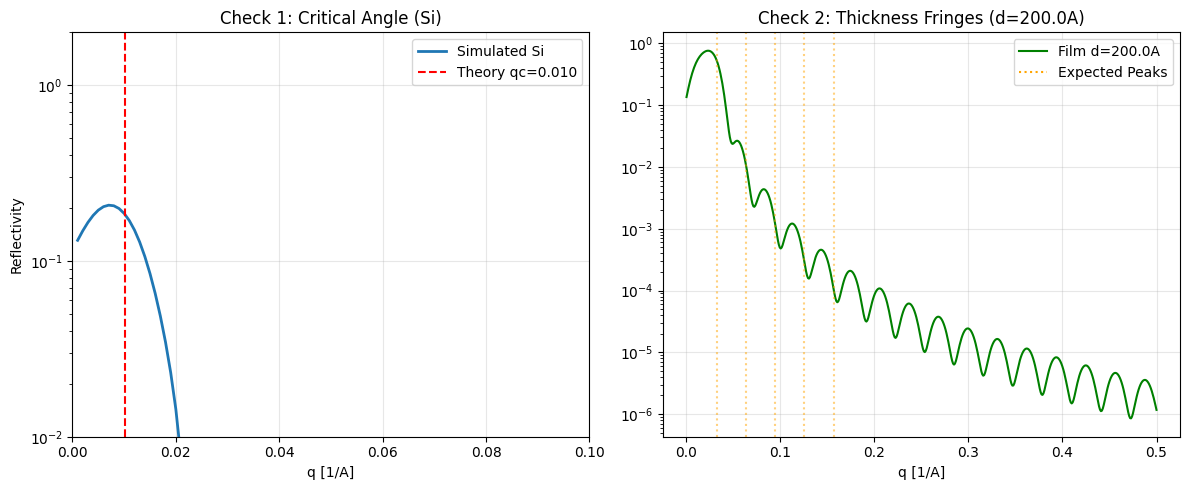

In [2]:
validate_physics()